In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
import json
import sys
import tqdm
from collections import defaultdict
import random
random.seed(42)

In [2]:
# EDA with all ids
with open("../full_data/all_ids.json", 'r') as f:
    all_ids = json.load(f)
    
len(all_ids)


df = pd.read_csv('../full_data/expanded_catalogue.csv')  
print(df.shape)


periods = list(df['period.period'].unique())
periods.remove(np.nan)
periodWiseDict = dict()
for period in periods:
    periodWiseDict[period] = []
for index, row in df.iterrows():
    if row['isImagePresent'] == 1 and row['period.period'] in periods and str(row['id']) in all_ids:
        periodWiseDict[row['period.period']].append(row['id'])
        
no_of_images = []
periods = []
for period in periodWiseDict.keys():
    no_of_images.append(len(periodWiseDict[period]))
    periods.append(period)
    
    
Z = [(y,x) for y,x in sorted(zip(no_of_images,periods), reverse=True)]
    
no_of_images = []
periods = []

for idx, (y,x) in enumerate(Z):
    no_of_images.append(y)
    periods.append(x)
    

/tmp/ipykernel_21700/3803068087.py:8: DtypeWarning: Columns (4,5,45,46,62,64,68,69,70,71,73,76,77,78,79,80,81,83,84,88,90,91,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../full_data/expanded_catalogue.csv')


(133923, 99)


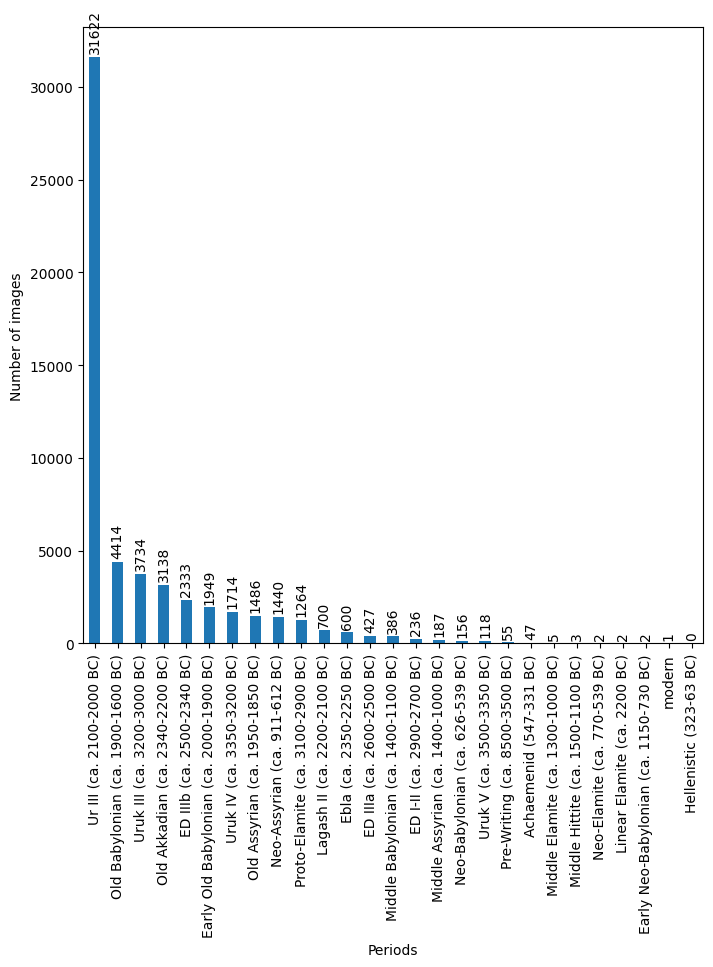

In [3]:

freq_series = pd.Series(no_of_images)

# Plot the figure.
plt.figure(figsize=(8, 8))
ax = freq_series.plot(kind="bar")

ax.set_xlabel("Periods")
ax.set_ylabel("Number of images")
ax.set_xticklabels(periods)


rects = ax.patches

# Make some labels.
# labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, no_of_images):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 200, label, ha="center", va="bottom", rotation ="vertical"
    )

# plt.show()
plt.savefig('cuneiform.png')

In [4]:
#Create balanced dataloader

batch_class_size = 300 #number of examples of a class in a batch
min_class_size = 100 #discard classes with number of examples less than this

train_ids_class_wise = defaultdict(list)
train_ids_all = []
val_ids_balanced = []
test_ids_balanced = []

period_to_label = {}
label = 0

for period in periodWiseDict.keys():
    pvalues = periodWiseDict[period]
    if len(pvalues) >= min_class_size: 
        random.shuffle(pvalues)
        val_ids_balanced = val_ids_balanced + pvalues[:int(batch_class_size*0.05)]
        test_ids_balanced = test_ids_balanced + pvalues[int(batch_class_size*0.05):int(batch_class_size*0.1)]
        train_ids_class_wise[label] = pvalues[int(batch_class_size*0.1):]          
        train_ids_all = train_ids_all + pvalues[int(batch_class_size*0.1):]   
        period_to_label[period] = label
        label+=1


In [5]:
split = {}
split["train"] = train_ids_all
split["val"] = val_ids_balanced
split["test"] = test_ids_balanced

import json
with open("train_val_test_split.json", "w") as f:
    json.dump(split,f)

In [6]:
with open("train_ids_class_wise.json", "w") as f:
    json.dump(train_ids_class_wise, f)

In [8]:
with open("period_to_label_mapping.json", "w") as f:
    json.dump(period_to_label, f)